<a href="https://colab.research.google.com/github/BFotouh/CIE417/blob/master/Assignments/Lab/T3/L3_BF_20201010ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First: Linear Regression using the normal equation

  $\vartheta =(X^TX)^{-1} X^Tt$ 


  > 
  $\vartheta$: Weight (coefficient) vector

  $X$: feature matrix where the first column is a column of ones representing the added bias and each other column represents the values of a certain feature.


Let’s generate some linear-looking data to test the normal equation

In [20]:
import numpy as np
num_points= 100 
x1 = 2* np.random.rand(num_points, 1) #Create an array of the shape 100x1 and populate it with random samples from a uniform distribution over [0, 1)
gaussian_noise= np.random.randn(num_points, 1) #sampled from a normal (Gaussian) distribution of mean 0 and variance 1
theta0= 4
theta1= 3
t = theta0 + theta1 * x1 + gaussian_noise

In [21]:
x0= np.ones((num_points, 1))
X = np.c_[x0, x1] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)

In [22]:
x0.shape

(100, 1)

In [23]:
X[0:5]

array([[1.        , 0.96174739],
       [1.        , 1.36483071],
       [1.        , 0.61532605],
       [1.        , 0.1544497 ],
       [1.        , 1.46540544]])

In [24]:
theta_best

array([[3.93608744],
       [3.22683106]])

Acceptable approximation to θ_0 and θ_1, but the noise made it impossible to recover the exact parameters of the original
function. 

Now you can make predictions using θ

In [25]:
X1_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2, 1)), X1_new] # add x0 = 1 to each instance
y_predict = X_new.dot(theta_best)
y_predict

array([[ 3.93608744],
       [10.38974956]])

Let’s plot this model’s predictions

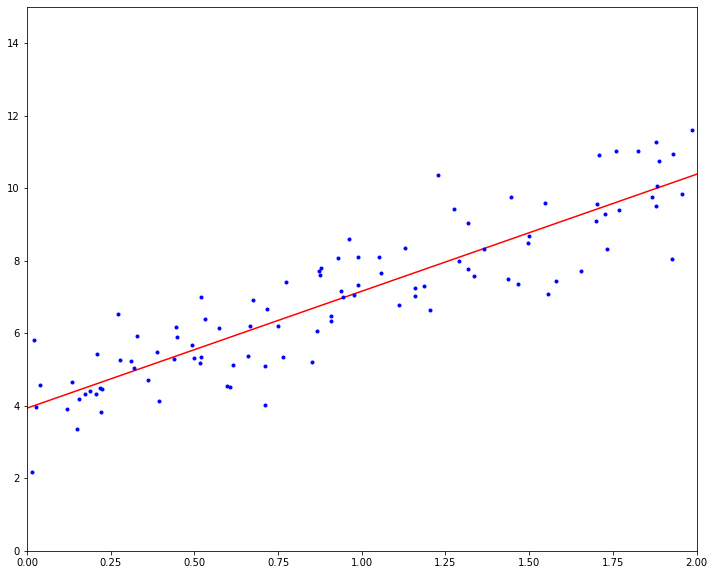

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

plt.plot(X1_new, y_predict, "r-")
plt.plot(x1, t, "b.")
plt.axis([0, 2, 0, 15]) #x axis range 0 to 2 and y axis range 0 to 15
plt.show()

#Second: linear regression using Scikit-Learn

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x1, t)
lin_reg.intercept_, lin_reg.coef_

(array([3.93608744]), array([[3.22683106]]))

In [28]:
lin_reg.predict(X1_new)

array([[ 3.93608744],
       [10.38974956]])

#Third: Linear regression using gradient descent


#Task 1 [2 points] 

Implement batch gradient descent and get the values of theta using your implementation. 

$\vartheta= \vartheta - (2\lambda/n)X^T(y-t)$

where n is the number of examples (data points). 

initial theta: [[1.82122544]
 [0.29385987]]
final theta: [[1.82835819]
 [0.3019614 ]]


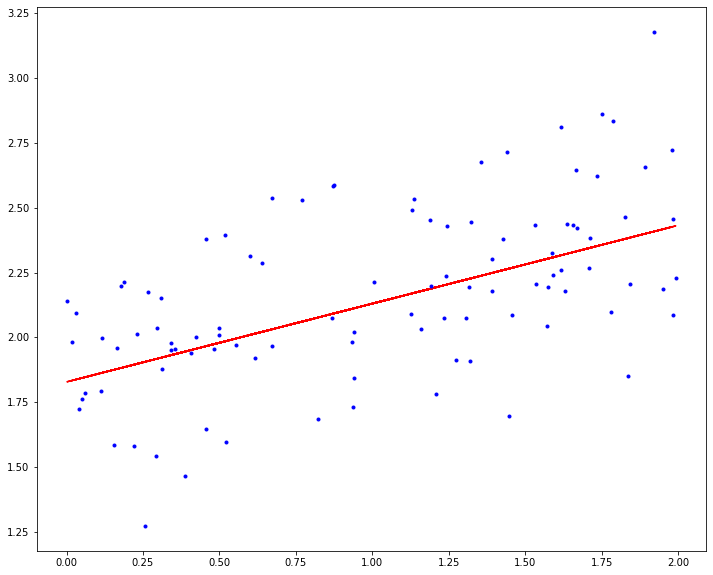

In [29]:
theta = np.random.randn(2,1)          # random initialization of model parameters
print("initial theta:", theta)

# getting the X parameters and the true values of the data
x0 = np.ones((num_points, 1))
x1 = 2* np.random.rand(num_points, 1) 
X = np.c_[x0, x1] 
X_true = np.c_[x0, x1 + gaussian_noise] 
t = np.dot(X_true,theta)

# the rate
learning_lambda = 0.001

#calculating the new theta
for i in range(num_points):
    y_predict = np.dot(X, theta)
    loss = y_predict - t
    gradient = np.dot(X.T, loss) / num_points
    theta = theta - (2 * learning_lambda * gradient)
print("final theta:", theta)

# getting the predicted values according to the final equation of theta 0 and 1
y_predict = np.dot(X, theta)

# plotting the values
plt.plot(x1, y_predict, "r-")
plt.plot(x1, t, "b.")
plt.show()

#Fourth: Linear Regression using SGD with Scikit-Learn

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x1, t.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([1.83481578]), array([0.33059364]))

#Fifth: Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

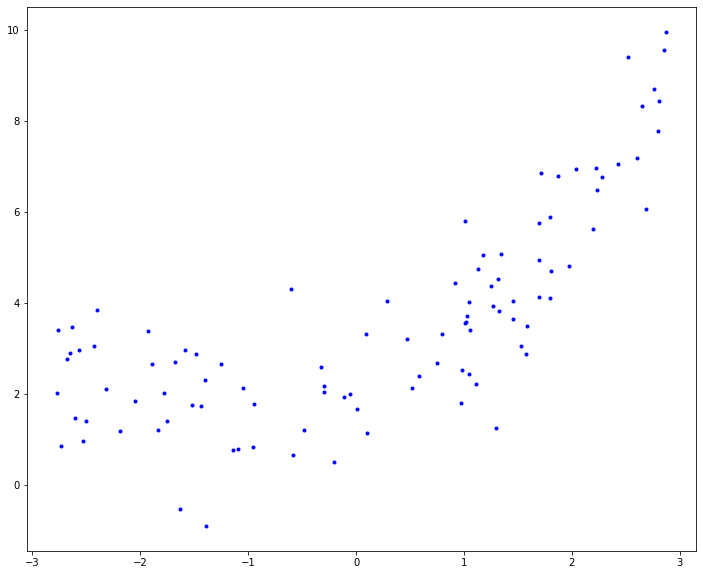

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
t = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, t, "b.")


Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [33]:
print('X[0]= ', X[0])
print('X_poly[0]= ', X_poly[0])

X[0]=  [-1.75088983]
X_poly[0]=  [-1.75088983  3.06561521]


X_poly now contains the original feature of X plus the square of this feature. 

Now you can fit a LinearRegression model to this extended training data

Intercept=  [2.04255535] and coefficients =  [[0.99155463 0.45444912]]
Root mean squared error=  1.0490828901199087


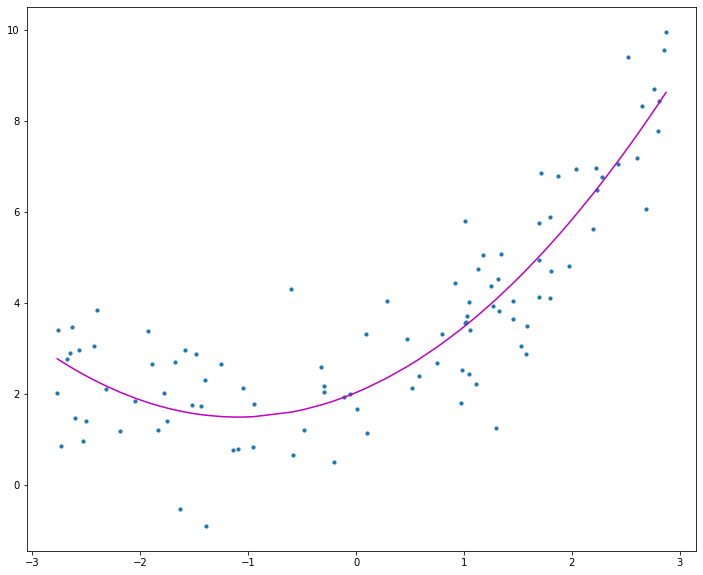

In [34]:
from sklearn.metrics import mean_squared_error
import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, t) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X, t, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

Not bad: The original
function was y = 0.5 x^2 + 1.0 x + 2.0 + Gaussian noise.

In [35]:
def poly_reg (X, t, power, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, t) #Fit the transformed features 
  y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 

  #evaluate test data 
  X_poly_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_poly_eval= lin_reg.predict(X_poly_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_poly_eval)) 

  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
  X_plot, y_poly_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_poly_pred_plot, color='m')
  axs[i].set_title('Polynomial of degree: %d'%power)
  return lin_reg.intercept_, lin_reg.coef_.tolist()[0], rmse, rmse_test

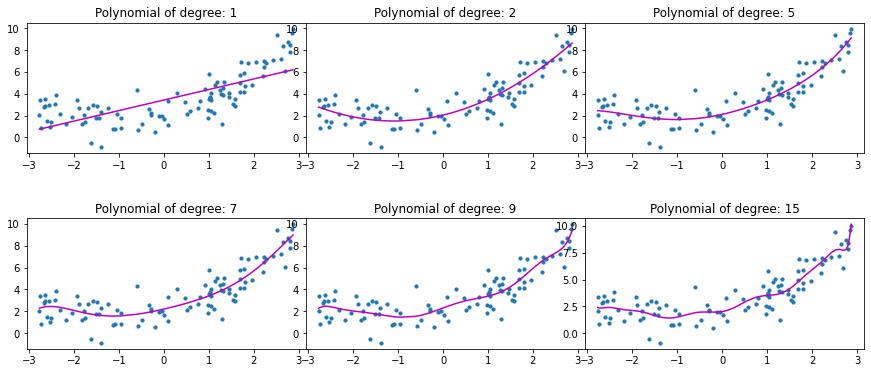

In [36]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 10*np.random.rand(m, 1)-4
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)


coeff= {}
rmse= {}
rmse_test={}
powers= [1,2,5,7,9,15]
for i in range (len(powers)):
  power= powers[i]
  intercept,coeff[power],rmse[power], rmse_test[power]= poly_reg (X, t, power, i, X_test, t_test)


In [37]:
rmse

{1: 1.5477403397239482,
 2: 1.0490828901199087,
 5: 1.0370382403563145,
 7: 1.0347771991372952,
 9: 1.0266731180740167,
 15: 1.010647102564263}

In [38]:
rmse_test

{1: 6.349780134050515,
 2: 1.1695445670117737,
 5: 10.309830883148031,
 7: 16.90424869023723,
 9: 2717.9749297964504,
 15: 2677029.9155013096}

In [39]:
import pandas as pd
coeff_lin_df= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in coeff.items()]))
coeff_lin_df

,1,2,5,7,9,15
0,0.964775,0.991555,0.918851,0.951297,1.529915,0.658751
1,NaN,0.454449,0.419455,0.215482,-0.118417,2.478694
2,NaN,NaN,-0.029457,-0.038465,-0.896148,1.501998
3,NaN,NaN,0.003239,0.078385,0.286968,-3.975631
4,NaN,NaN,0.007056,0.005535,0.383002,-1.995483
5,NaN,NaN,NaN,-0.006745,-0.048575,2.771579
6,NaN,NaN,NaN,0.000340,-0.062303,1.120415
7,NaN,NaN,NaN,NaN,0.002593,-0.931360
8,NaN,NaN,NaN,NaN,0.003476,-0.325251
9,NaN,NaN,NaN,NaN,NaN,0.164238


#Sixth: Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
def ridge_reg (X, t, power, alpha, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  ridge_reg = Ridge(alpha=alpha)
  ridge_reg.fit(X_poly, t) #Fit the transformed features 
  y_ridge_pred = ridge_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_ridge_pred)) 

  #evaluate test data 
  X_ridge_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_ridge_eval= ridge_reg.predict(X_ridge_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_ridge_eval)) 


  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_ridge_pred), key=sort_axis)
  X_plot, y_ridge_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_ridge_pred_plot, color='m')
  axs[i].set_title('alpha= : %.3f'%alpha)
  return ridge_reg.intercept_, ridge_reg.coef_.tolist()[0], rmse, rmse_test

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.23001e-17): result may not be accurate.
  overwrite_a=True).T


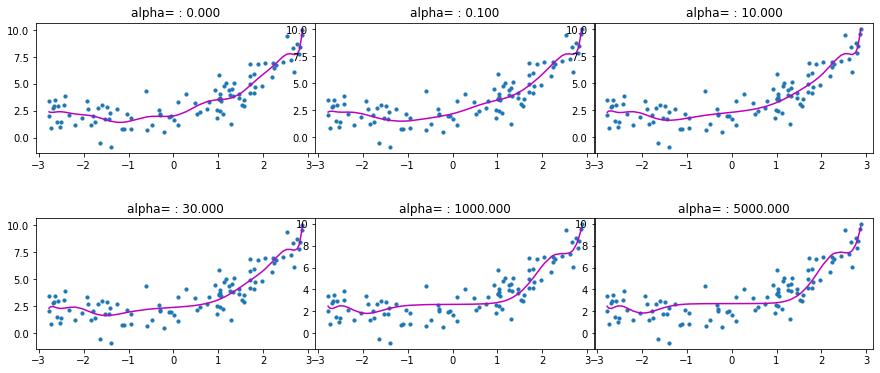

In [41]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 3*np.random.rand(m, 1)+1
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

coeff_ridge= {}
rmse_ridge= {}
rmse_ridge_test= {}
power= 15
alphas= [0,0.1,10,30, 1000, 5000]
for i in range (len(alphas)):
  alpha= alphas[i]
  intercept_ridge,coeff_ridge[alpha],rmse_ridge[alpha],rmse_ridge_test[alpha]= ridge_reg (X, t, power,alpha, i, X_test, t_test)


In [42]:
rmse_ridge

{0: 1.010647102564273,
 0.1: 1.0140147552518695,
 10: 1.0266442601071586,
 30: 1.0389154394971576,
 1000: 1.1315297333444008,
 5000: 1.165110317100393}

In [43]:
coeff_ridge_df= pd.DataFrame(dict([(k,pd.Series(v)) for k,v in coeff_ridge.items()]))
coeff_ridge_df

,0.0,0.1,10.0,30.0,1000.0,5000.0
0,0.658751,1.033498,0.453483,0.279517,0.029597,0.007696
1,2.478693,0.749064,0.108113,0.067542,0.007559,0.002149
2,1.502000,0.243161,0.246485,0.199419,0.035698,0.010909
3,-3.975631,-0.935961,0.050790,0.046416,0.010281,0.003701
4,-1.995486,-0.640506,0.072398,0.115494,0.041625,0.016172
5,2.771578,0.665527,0.022176,0.023761,0.011660,0.005727
6,1.120417,0.455593,-0.042951,0.011424,0.033186,0.020591
7,-0.931360,-0.216339,-0.006651,-0.002897,0.006973,0.006093
8,-0.325252,-0.156634,-0.011312,-0.050148,-0.002002,0.014739
9,0.164238,0.037482,0.001418,-0.000215,-0.000889,0.000589


In [44]:
coeff_lin_df[15]

0     0.658751
1     2.478694
2     1.501998
3    -3.975631
4    -1.995483
5     2.771579
6     1.120415
7    -0.931360
8    -0.325251
9     0.164238
10    0.051618
11   -0.014639
12   -0.004254
13    0.000520
14    0.000142
Name: 15, dtype: float64

#Seventh: Lasso Regression

#Task 2 [2 points]
1. complete lasso_reg function to perform lasso regression and test it using the code in the below cell. [1 p]

2. How do the coefficients of lasso and ridge regression compare or the same values of alpha? [0.25 p]

3. How do the rmse values of lasso and ridge regression compare for the same values of alpha? [0.25 p]

4. Explain how lasso coefficients are used as feature selectors. [0.5 p]

In [56]:
from sklearn.linear_model import Lasso
def lasso_reg (X, t, power, alpha, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lasso_reg = Lasso(alpha=alpha)
  lasso_reg.fit(X_poly, t) 
  # repredicting the values to calculate RMSE
  t_train_pred = lasso_reg.predict(X_poly)  
  rmse = np.sqrt(mean_squared_error(t,t_train_pred)) 

  # using the model to predict the test values and calculate the RMSE_test
  t_test_eval= lasso_reg.predict(poly_features.fit_transform(X_test))
  rmse_test = np.sqrt(mean_squared_error(t_test,t_test_eval)) 

  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,t_train_pred), key=sort_axis)
  X_plot, t_train_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, t_train_pred_plot, color='m')
  axs[i].set_title('alpha= : %.3f'%alpha)
  return lasso_reg.intercept_, lasso_reg.coef_.tolist(), rmse, rmse_test


# 2) Coefficients of lasso reg. are smaller than that of ridge reg. (for the same alpha)
# 3) RMSE of lasso reg. is higher than that of ridge reg. (for the same alpha)
# 4) The absolute value of the magnitude of coefficients is added as a penality for each feature.
#    The larger the penality is, the more the value will be closer to zero and hence eliminating the feature from the model.
#    Moreover, some coefficients could be zero and be eliminated as well.
#    resulting in scattered model with few coefficients.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.70257839214475, tolerance: 0.051882286312633384
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.516940412800395, tolerance: 0.051882286312633384
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_desc

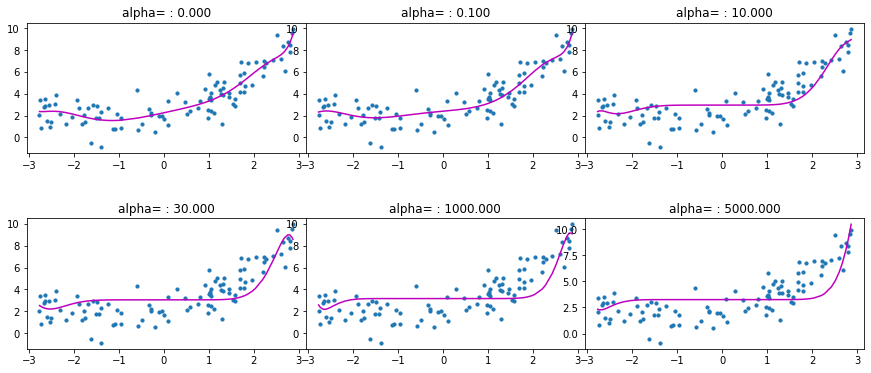

In [57]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 3*np.random.rand(m, 1)+1
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

coeff_lasso= {}
rmse_lasso= {}
rmse_lasso_test= {}
power= 15
alphas= [0,0.1,10,30, 1000, 5000]
for i in range (len(alphas)):
  alpha= alphas[i]
  intercept_lasso,coeff_lasso[alpha],rmse_lasso[alpha],rmse_lasso_test[alpha]= lasso_reg (X, t, power,alpha, i, X_test, t_test)


#Task 3 [4 points]



1. Read the data from https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv into a dataframe. **[0.5 P]**

2. Use the column "level" as your feature and "salary" as the label. **[0.5 p]** 

3. Split the data into train and test using sklearn train_test_split with test size= 0.2 **[1 P]**

4. Fit a linear regression model, a 4th degree polynomial model and a 15th degree polynomial model to the data. **[1 P]** 

5. Plot the prediction results of each model and comment on their fitting (Overfitting, underfitting, best fitting) **[1 P]**

Intercept mdl1= 
 [135486.37366804] 
and coefficients mdl1 = 
 [[-143427.12888393   68157.93948411  -11608.84599445     709.02332493]]
Root mean squared error mdl1= 
 38573.73363836879
R2 mdl1= 
 0.9692575841569457
Intercept mdl2 = 
 [44907.4261322] 
and coefficients mdl2 = 
 [[ 6.21724328e-01  1.81799303e+00  4.04308716e+00  7.96406212e+00
   1.42295956e+01  2.25022907e+01  2.91494495e+01  2.48055734e+01
   4.37883669e-01 -2.30636326e+01  1.27889561e+01 -3.08505743e+00
   3.86861898e-01 -2.47211507e-02  6.37061247e-04]]
Root mean squared error mdl2 = 
 23568336.298291568
R2 mdl2 = 
 -11475.580079945617
Test Data: 
 [[9]
 [3]]
model 1 is best fitting, it works properly on almost both the training set and test sets; taking intro consideration the small size of the data
model 2 is overfitting, it works properly on training set but poorly on test set


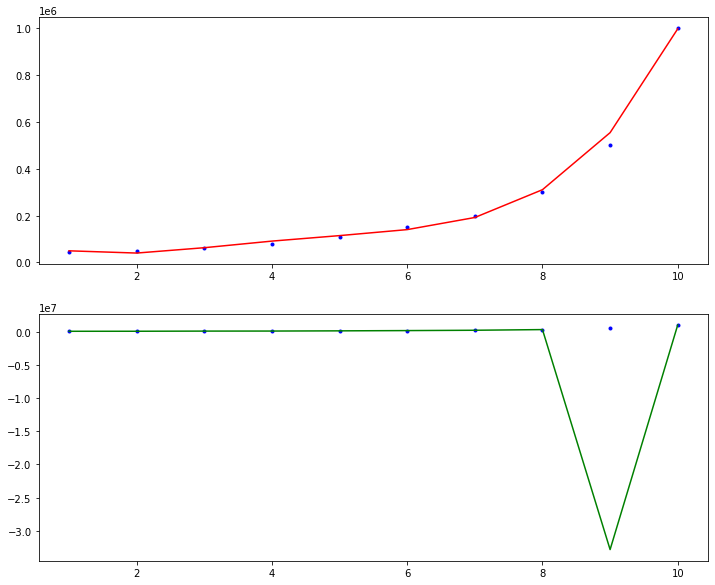

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# get the data into dataframe
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')

# extract the freature and the label into separate variables 
X, T = np.c_[df['Level']], np.c_[df['Salary']]

# split the data into training and test sets
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

# fitting the data into polynomial models (4 and 15)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_train) 

poly2 = PolynomialFeatures(degree=15, include_bias=False)
X_poly2 = poly2.fit_transform(X_train) 

# creating the models
poly.fit(X_poly, T_train) 
reg_mdl1 = LinearRegression() 
reg_mdl1.fit(X_poly, T_train)

poly2.fit(X_poly2, T_train) 
reg_mdl2 = LinearRegression() 
reg_mdl2.fit(X_poly2, T_train)

# predicting the label using the test values and calculating the error
T_pred = reg_mdl1.predict(poly.fit_transform(X_test))  
rmse = np.sqrt(mean_squared_error(T_test,T_pred)) 
r2 = r2_score(T_test,T_pred)
print("Intercept mdl1= \n", reg_mdl1.intercept_,"\nand coefficients mdl1 = \n" ,reg_mdl1.coef_)
print("Root mean squared error mdl1= \n", rmse)
print("R2 mdl1= \n", r2)

T_pred2 = reg_mdl2.predict(poly2.fit_transform(X_test))  
rmse_mdl2 = np.sqrt(mean_squared_error(T_test,T_pred2)) 
r2_mdl2 = r2_score(T_test,T_pred2)
print("Intercept mdl2 = \n", reg_mdl2.intercept_,"\nand coefficients mdl2 = \n" ,reg_mdl2.coef_)
print("Root mean squared error mdl2 = \n", rmse_mdl2)
print("R2 mdl2 = \n", r2_mdl2)

print('Test Data: \n', X_test)

print('model 1 is best fitting, it works properly on almost both the training set and test sets; taking intro consideration the small size of the data')

print('model 2 is overfitting, it works properly on training set but poorly on test set')

# plotting the models
fig, axs = plt.subplots(2)

axs[0].plot(X,T,'b.')
axs[0].plot(X, reg_mdl1.predict(poly.fit_transform(X)), 'r') 

axs[1].plot(X,T,'b.')
axs[1].plot(X, reg_mdl2.predict(poly2.fit_transform(X)), 'g') 

#Task 4 [2 points]

1. Read the attached admission data. **[0.25 P]**
2. Split the data into features and label. **[0.25 P]**
3. Split the data into train and test with test size= 0.2 **[0.25 P]**
4. Standardize the data (X_train and X_test) **[0.5 P]**
5. Fit a linear regression model. **[ 0.25 P]**
6. Print the mean squared error value. **[0.25 P]**
7. Plot the prediction results for the test data. **[0.25 P]**


Intercept = 
 [0.72346875] 
and coefficients = 
 [[0.11427709]]
Root mean squared error = 
 0.07670869521215909
R2 = 
 0.6906172033461826


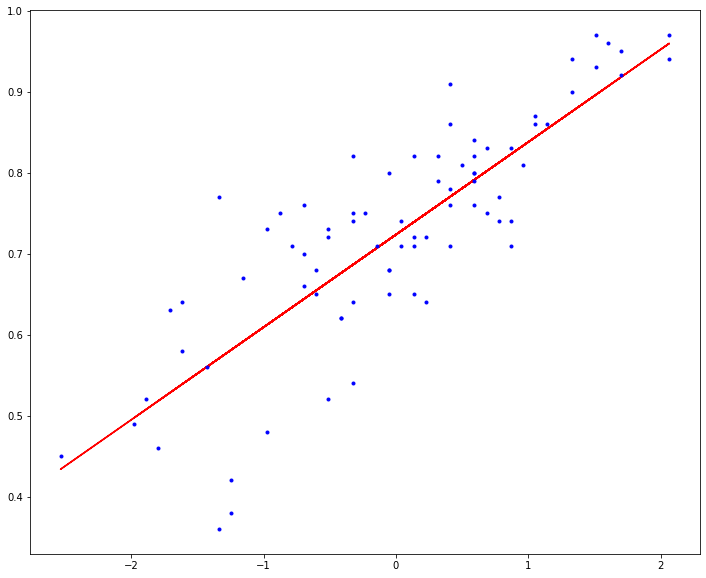

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# get the data into dataframe
df = pd.read_csv('/content/sample_data/Admission_Predict.csv')

# extract the freature and the label into separate variables 
X, T = np.c_[df['GRE Score']], np.c_[df['Chance of Admit ']]

# split the data into training and test sets
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

# Standardize the data (X_train and X_test)
X_train = (X_train - X_train.mean())/(X_train.std())
X_test = (X_test - X_test.mean())/(X_test.std())

# Fit a linear regression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train, T_train)

# Print the mean squared error value. 
T_pred = lin_reg.predict(X_test)  
rmse = np.sqrt(mean_squared_error(T_test,T_pred))
r2 = r2_score(T_test,T_pred)
print("Intercept = \n", lin_reg.intercept_,"\nand coefficients = \n" , lin_reg.coef_)
print("Root mean squared error = \n", rmse)
print("R2 = \n", r2)


# Plot the prediction results for the test data
plt.plot(X_test, T_pred, "r-")
plt.plot(X_test, T_test, "b.")
#plt.plot(X_train, T_train, "b.")
plt.show()


#Bonus [0.25 P]

**Which of the following statements is true about outliers in Linear regression and why?**

A) Linear regression is sensitive to outliers

B) Linear regression is not sensitive to outliers

(A) is True and correct, because regression is mainly based on mean calculations -  the parameters of the model are calculated basen on the RMSE which is mainly a representation of the average distance between the true values and the mean value of our hypothesis. Since the mean calculation includes all the values of the data, it will be highly affected by the outliers.